## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

## Questions we would like to answer

1. How many episodes did each season have? Did the number of episodes influence the mean rating of the seasons?
2. Did the presence of guest stars influence the number of US viewers (in millions)?
3. Were there any guest stars in the most viewed episode of the show? Who were they?
4. Which directors worked on more than 10 episodes of the whole show? Statistically speaking, did the ratings of their episodes differ much from one another?
5. How many Christmas episodes did the series have? Did the show have any episodes which aired on Christmas evenings?
6. How did the ratings change through time? Which episodes had the lowest and highest ratings?

## 1 - Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2 - Loading and preparing the dataset

In [2]:
df = pd.read_csv('datasets/office_episodes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [3]:
# Since the release_date column has the dates as strings, we will convert them to the datetime dtype for later use
df['release_date'] = pd.to_datetime(df['release_date'])

# The only null values in the dataset are in the column guest_stars, representing the absence of guest stars in the
# respective episodes. We shall replace the NaN with the string 'None'.
df = df.fillna('None')
df.head(3)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,None,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,None,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,None,Ken Whittingham,Paul Lieberstein,False,0.37500


## 3 - Exploratory data analysis

Let us write a function that will help us create some plots.

In [4]:
def plotsDetails(title, xlabel, ylabel, title_size=16, xticks_rot=0, yticks_rot=0):
    """This function sets the title, the axes labels and ticks rotations, besides showing the plot
        Args:
            title (string): title of the chart
            xlabel (string): label for the x axe
            ylabel (string): label for the y axe
            title_size (int): size of the font used in the title
            xticks_rot (int): rotation of the ticks of the x axe (default = 0)
            yticks_rot (int): rotation of the ticks of the y axe (default = 0)
                    
        Returns:
            None
    """
    plt.title(title, fontsize=title_size)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(rotation=yticks_rot)
    plt.xticks(rotation=xticks_rot)
    plt.show()

<p> To begin with, let us take a look at how many episodes each season had and if the number of episodes influenced the mean rating of the seasons.

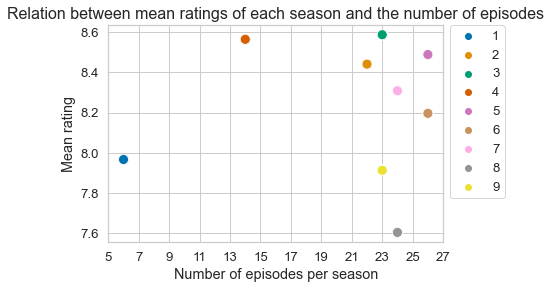

In [5]:
%matplotlib inline
# Choosing an appropriate color palette
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
palette = sns.color_palette(palette='colorblind', n_colors=9)

# Grouping the mean of the ratings by season
mean_sr = df.groupby('season')['ratings'].mean().reset_index()
count_es = df.groupby('season')['episode_number'].count().reset_index()

# Creating a new dataframe which has information about seasons, ratings and the mean ratings
df_seasons = df[["season","ratings"]]
df_seasons = df_seasons.merge(mean_sr, how="left", on="season")
df_seasons = df_seasons.merge(count_es, how="left", on="season")
df_seasons.columns = ["season","ratings", "mean_ratings", "nb_episodes"]

# Creating a scatter plot to exhibit the relation between number of episodes in each season and the respective mean ratings


sns.scatterplot(x='nb_episodes', y='mean_ratings', data=df_seasons, hue ='season', palette = palette, s=100)
plt.xticks(np.arange(5,28, 2))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Calling the function the add the title, labels and show the plot
plotsDetails('Relation between mean ratings of each season and the number of episodes', 'Number of episodes per season', 'Mean rating')

This plot reveals that the number of episodes did not influence directly in the mean rating of the seasons. Next, we will check for the relation between viewership (in millions) and the presence of guest stars.

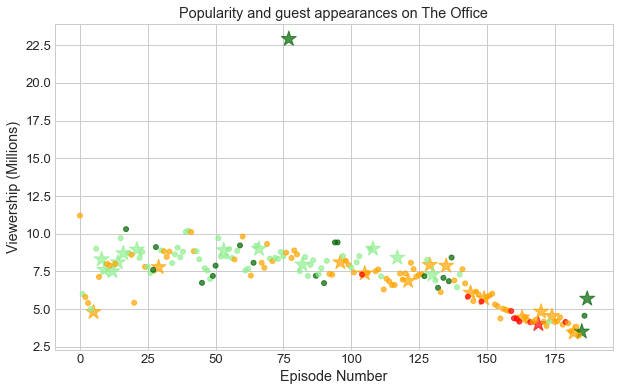

The mean rating of episodes with guest stars was 8.197, whilst episodes with no guests had a mean rating of 8.245.
Besides that, 7.433 and 7.212 are, respectively, the mean viewership in millions of episodes with guest stars and without a guest.


In [6]:
# In this plot we don't use the seaborn package, following a suggestion from the datacamp instructions
# This is the only plot suggested in their guide

%matplotlib inline
# Creating figure and axes
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()


# Creating a list to color the scatter plot
colors = []

for rating in df['scaled_ratings']:
    if rating < 0.25:
        colors.append('red')
    elif rating < 0.50:
        colors.append('orange')
    elif rating < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')
        
# Creating a list for the sizing system of the scatter plot, according to whether or not there are guest appearances in the episode.
sizes = []

for row in df['has_guests']:
    if row:
        sizes.append(250)
    else:
        sizes.append(25)
        
# Adding two columns to the original dataframe to make it easier for us to plot according to the presence of guest stars
df['colors'] = colors
df['sizes'] = sizes

# Splitting data into guest and nonguest stars dataframes
guests_df = df[df['has_guests'] == True]
nonguests_df = df[df['has_guests'] == False]
        
# Creating the scatter plot
ax.scatter(guests_df['episode_number'], guests_df['viewership_mil'], s=guests_df.sizes, c=guests_df.colors, alpha=0.7, marker='*')
ax.scatter(nonguests_df['episode_number'], nonguests_df['viewership_mil'], s=nonguests_df.sizes, c=nonguests_df.colors, alpha=0.7)

ax.set(title = 'Popularity and guest appearances on The Office',
      xlabel = 'Episode Number',
      ylabel = 'Viewership (Millions)')

plt.show()

# Checking for guest stars in the most viewed episode of the show

df.loc[df['viewership_mil'] == df['viewership_mil'].max(), 'guest_stars']

# Comparing the mean rating and the viwership (millions) of episodes with and without guest stars

df_guests = df[df['has_guests']==True]
df_noguests = df[~df['has_guests']==True]

print('The mean rating of episodes with guest stars was {}, whilst episodes with no guests had a mean rating of {}.'.format(df_guests['ratings'].mean().round(3),df_noguests['ratings'].mean().round(3)))
print('Besides that, {} and {} are, respectively, the mean viewership in millions of episodes with guest stars and without a guest.'.format(df_guests['viewership_mil'].mean().round(3), df_noguests['viewership_mil'].mean().round(3)))

The most viewed episode of the show was episode number 77, with more than 22.5 million viewers when it aired. Moreover, there were three guest stars in this episode, Cloris Leachman, Jack Black and Jessica Alba. In this chart the points marked as stars indicate the presence of at least one guest star in the episode. 

One important thing this plot reveals is that the presence of guest stars was not necessarily an indicative of bigger viewership, since the vast majority of the star points share, on average, the same viewership numbers as the episodes without a guest star.

Next, we shall investigate information about the most frequent directors who worked on the show.

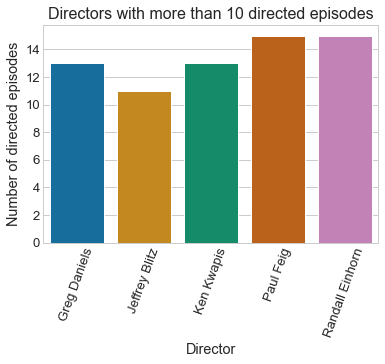

In [7]:
%matplotlib inline

# Creating a dataframe with the directors who directed 10 or more episodes
unique_dir = df.groupby('director')[['episode_number']].count().reset_index()
unique_dir = unique_dir[unique_dir['episode_number'] > 10]
unique_dir.columns =  ['director','nb_dir_episodes']

# Plotting the number of episodes each of these directors worked on

sns.barplot(x='director', y='nb_dir_episodes', data=unique_dir, palette = palette)

# Calling the function the add the title, labels and show the plot
plotsDetails('Directors with more than 10 directed episodes', 'Director', 'Number of directed episodes', xticks_rot=70)

The above plot shows that there were 5 directors among the group who directed 10 or more episodes of The Office throughout the whole show. The two most frequent were Paul Feig and Randall Einhorn, with 15 episodes each. To extract more statistical information about the episodes directed by these individuals, let us make a box plot.

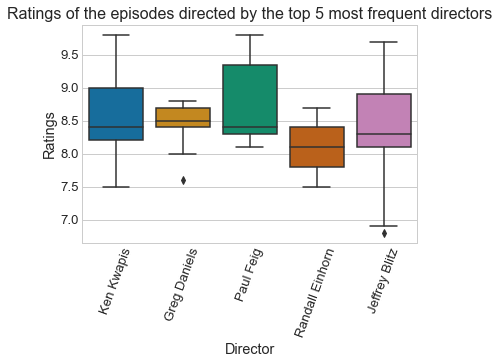

In [8]:
%matplotlib inline
top_directors = ['Greg Daniels', 'Jeffrey Blitz', 'Ken Kwapis', 'Paul Feig', 'Randall Einhorn']
df_top_dir = df[df['director'].isin(top_directors)]

sns.boxplot(x = df_top_dir['director'], y = df_top_dir['ratings'], data=df_top_dir, palette = palette)

# Calling the function the add the title, labels and show the plot
plotsDetails('Ratings of the episodes directed by the top 5 most frequent directors', 'Director', 'Ratings', xticks_rot=70)

From this plot one sees that the median of the ratings of each director lie in the interval [8.0, 8.6]. The only directors whose episodes had ratings representing outliers were Greg Daniels and Jeffrey Blitz. Furthermore, the episodes directed by Paul Feig had the biggest rating variability of the five directors, while the first quartile was closer to the median than the third quartile.

Let us answer the question about Christmas episodes now.

In [9]:
print('Episodes which aired on December, on any year: \n', df.loc[(df['release_date'].dt.month == 12),'release_date'])

df_xmas = df[df['release_date'].dt.month == 12]

print('\nNumber of Christmas themed episodes: ', df_xmas.episode_title.str.contains('santa|christmas', case=False).sum())

Episodes which aired on December, on any year: 
 15    2005-12-06
37    2006-12-14
73    2008-12-04
74    2008-12-11
102   2009-12-03
103   2009-12-10
126   2010-12-02
127   2010-12-09
149   2011-12-01
150   2011-12-08
173   2012-12-06
Name: release_date, dtype: datetime64[ns]

Number of Christmas themed episodes:  7


This cell shows that there were no episodes of The Office which aired on Christmas evenings, although there were 7 episodes of the series with the Christmas theme which aired in the December month.

Now, let us evaluate how the ratings of the episodes changed throughout the years.

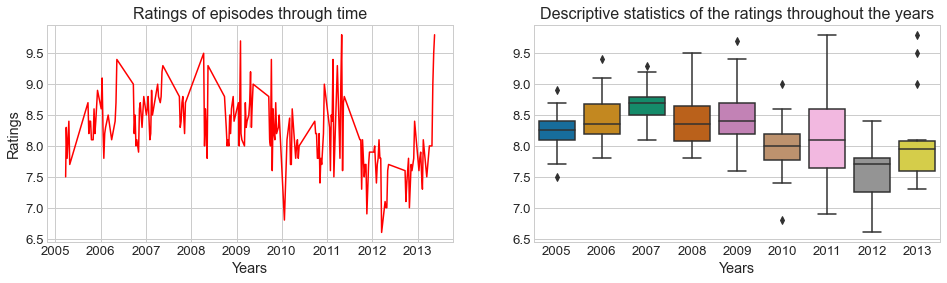

Highest rated episodes: 
                 season  ratings  rel_date_year
episode_number                                
137                  7      9.8           2011
187                  9      9.8           2013
Lowest rated episodes: 
                 season  ratings  rel_date_year
episode_number                                
159                  8      6.6           2012


In [10]:
# We shall create subplots. For that, let us create a figure and an axe
fig, ax = plt.subplots(1,2, figsize=(16,4))

# Creating a column in df with the years in which the show aired
df['rel_date_year'] = df['release_date'].dt.year

# Creating a line plot and a box plot to illustrate the change of the ratings through time and associated statistical information
sns.lineplot(x = df['release_date'], y = df['ratings'], data = df, legend=False, color='red', ax=ax[0])
sns.boxplot(x = df['rel_date_year'], y = df['ratings'], data = df, ax=ax[1], palette = palette)

ax[0].set_title('Ratings of episodes through time', fontsize=16)
ax[1].set_title('Descriptive statistics of the ratings throughout the years', fontsize=16)
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Ratings')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('')
plt.show()

print('Highest rated episodes: \n', df[df['ratings'] == df['ratings'].max()][['episode_number','season','ratings', 'rel_date_year']].set_index('episode_number'))
print('Lowest rated episodes: \n', df[df['ratings'] == df['ratings'].min()][['episode_number','season','ratings', 'rel_date_year']].set_index('episode_number'))

These plots reveal that the show had the lowest rated episode in 2012, its penultimate year being aired live. Moreover, 2011 had the biggest rating variability, whilst the presence of rating outliers wasn't detected in that year. Nonetheless, in terms of outliers, 2013 had 3 of those on the upper part of the chart, representing ratings that were distant from the standard ratings of the episodes which aired on that year.

## 4 - Conclusions

The popularity of the US version of The Office is enormous, with 9 seasons and great rating and viewership numbers through the years. To begin with, out analysis revealed that the number of episodes in a season did not interfere in the mean rating of the episodes of that season. However, there were only two out of the nine seasons with less than 21 episodes, thus it is difficult to infer that shorter seasons, meaning a shorter investment in production, would have been rated similarly by the reviewers.

Now, episode number 77 had more than 22.5 million viewers when it went live, being the most viewed episode of The Office. However, this was an outlier, since no other episode got a viewership number close to this. Furthermore, we were able to determine that the presence of guest stars was not an impact factor when considering the increase of the viewership base, nor the mean rating of the episodes.

Considering the directors who worked on the show, there were 5 among those who directed more than 10 episodes, which represents about 5.3% of the episodes of the series. The top 2 of directors had Paul Feig and Randall Einhorn, with 15 episodes each, almost 8% of the total number of episodes. The medians of the episodes' ratings each of these directors had didn't differ much, meaning their work was appreciated, on average, similarly by the reviewers.

Moreover, The Office did not have any special episodes which aired on Christmas days, which is surprising if we consider the popularity of the series. However, there were 7 episodes built around this holiday which aired in December, in different years.

Finally, the series was able to sustain good rating numbers while it went live. Let us recall that the ratings present in the DataFrame represent the average rating each episode received. Even though the first season didn't have an episode rated 9.0 or above, this was achieved in almost all of the subsequent years, with an exception for 2012, corresponding to the 8th season, when the series received its lowest ratings. Furthermore, the last episode of the show received the highest rating the series ever got, 9.8, which was also accomplished in the episode number 137, in the 7th season. Besides the quality of the last episode, this may also be due to the fact it ended such a popular show.
